In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [171]:
df = pd.read_csv("accidents.csv")
df.head()

,제목,본문,보낸사람:(이름),보낸사람:(주소),보낸사람:(유형),받는사람:(이름),받는사람:(주소),받는사람:(유형),참조:(이름),참조:(주소),참조:(유형),숨은참조:(이름),숨은참조:(주소),숨은참조:(유형),거리,범주 항목,비용 정보,우편물 종류,중요도
0,108,\r\n\r\nFrom: 홍우식 <wshong@koreazinc.co.kr>\r\n...,손충만,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,EX,NaN,/o=ExchangeLabs/ou=Exchange Administrative Gro...,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보통,중간
1,107,\r\n\r\nFrom: 김웅열 <woykim@koreazinc.co.kr>\r\n...,손충만,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,EX,NaN,/o=ExchangeLabs/ou=Exchange Administrative Gro...,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보통,중간
2,106,\r\n\r\nFrom: 이기홍 <ghlee@koreazinc.co.kr>\r\nS...,손충만,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,EX,NaN,/o=ExchangeLabs/ou=Exchange Administrative Gro...,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보통,중간
3,105,\r\n\r\nFrom: 김상승 <kss0330@koreazinc.co.kr>\r\...,손충만,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,EX,NaN,/o=ExchangeLabs/ou=Exchange Administrative Gro...,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보통,중간
4,104,\r\n\r\nFrom: 김영민[정련팀] <yomkim@koreazinc.co.kr...,손충만,/O=EXCHANGELABS/OU=EXCHANGE ADMINISTRATIVE GRO...,EX,NaN,/o=ExchangeLabs/ou=Exchange Administrative Gro...,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보통,중간


In [172]:
len(df)

106

In [173]:
df = df.iloc[:,1:2]
df = df.drop([74,101]).reset_index(drop=True)  #1, 일시 2, 장소 <-- 이렇게 되어있는 행
df

,본문
0,\r\n\r\nFrom: 홍우식 <wshong@koreazinc.co.kr>\r\n...
1,\r\n\r\nFrom: 김웅열 <woykim@koreazinc.co.kr>\r\n...
2,\r\n\r\nFrom: 이기홍 <ghlee@koreazinc.co.kr>\r\nS...
3,\r\n\r\nFrom: 김상승 <kss0330@koreazinc.co.kr>\r\...
4,\r\n\r\nFrom: 김영민[정련팀] <yomkim@koreazinc.co.kr...
...,...
99,\r\n\r\nFrom: 김의식 <ewskim@koreazinc.co.kr>\r\n...
100,\r\n\r\nFrom: 김민철 <mckim@koreazinc.co.kr>\r\nS...
101,\r\n\r\nFrom: 김민철 <mckim@koreazinc.co.kr>\r\nS...
102,\r\n\r\nFrom: 정영도 <ydojung@koreazinc.co.kr>\r\...


1. 시간
2. 장소
3. 사고 내용
4. 사고 원인
5. 상태 및 인적사항
6. 이송방법

# 시간

In [174]:
time = []
# 시간 정보 추출
for i in range(len(df)):
    time.append(re.findall(r'2022년.*', df.iloc[i,0]))
    if time[i] == []:
        time[i] = re.findall(r'\d{1,2}월 \d{1,2}일 \d{1,2}시.*', df.iloc[i,0])

for i in range(len(df)):
    if time[i] == []:
            time[i] = re.findall(r'2022[.]\d{1,2}[.]\d{1,2}.*', df.iloc[i,0])

for i in range(len(df)):
    if time[i] == []:
            time[i] = re.findall(r'\d{1,2}월 \d{1,2}일 \d{1,2}:\d{2}.*', df.iloc[i,0])

for i in range(len(time)):
    time[i]= time[i][0]

# 특수문자, ~경 제거    
for i in range(len(time)):
    time[i] = re.sub('\r', '',time[i])
    time[i] = re.sub('\u3000', '',time[i])
    time[i] = re.sub('경', '',time[i])

# 년도 표시 추가
for i in range(len(time)):
    if time[i].startswith('2022'):
        pass
    else:
        time[i] = '2021년 '+time[i]

In [175]:
# re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)

In [176]:
# 숫자만 추출
for i in range(len(time)):
    time[i] = re.findall('\d+', time[i])

# '시'까지 반올림
for j in time:
    if len(j) == 5:
        if int(j[4]) >= 30:
            j[3] = str(int(j[3])+1)
        del j[4]
df['time'] = time

In [177]:
# 0x월 --> x월
for i in range(104):
    if df['time'][i][1].startswith('0'):
        df.at[i,'time'][1] = df['time'][i][1][1]
df 

,본문,time
0,\r\n\r\nFrom: 홍우식 <wshong@koreazinc.co.kr>\r\n...,"[2022, 9, 15, 14]"
1,\r\n\r\nFrom: 김웅열 <woykim@koreazinc.co.kr>\r\n...,"[2022, 9, 12, 11]"
2,\r\n\r\nFrom: 이기홍 <ghlee@koreazinc.co.kr>\r\nS...,"[2022, 9, 07, 10]"
3,\r\n\r\nFrom: 김상승 <kss0330@koreazinc.co.kr>\r\...,"[2022, 9, 6, 15]"
4,\r\n\r\nFrom: 김영민[정련팀] <yomkim@koreazinc.co.kr...,"[2022, 9, 5, 16]"
...,...,...
99,\r\n\r\nFrom: 김의식 <ewskim@koreazinc.co.kr>\r\n...,"[2022, 2, 20, 16]"
100,\r\n\r\nFrom: 김민철 <mckim@koreazinc.co.kr>\r\nS...,"[2021, 12, 7, 10]"
101,\r\n\r\nFrom: 김민철 <mckim@koreazinc.co.kr>\r\nS...,"[2021, 12, 2, 17]"
102,\r\n\r\nFrom: 정영도 <ydojung@koreazinc.co.kr>\r\...,"[2021, 12, 1, 13]"


In [178]:
# 월별 발생 사고 횟수 딕셔너리 생성
monthdict = {}
for i in range(104):
    if int(df['time'][i][1]) not in monthdict:
        monthdict[int(df['time'][i][1])] = 1
    else:
        monthdict[int(df['time'][i][1])] = monthdict[int(df['time'][i][1])] + 1
monthdict[1] = 0
monthdict[11] = 0
month = sorted(monthdict.items())
month

[(1, 0),
 (2, 1),
 (3, 5),
 (4, 7),
 (5, 12),
 (6, 13),
 (7, 27),
 (8, 22),
 (9, 13),
 (10, 1),
 (11, 0),
 (12, 3)]

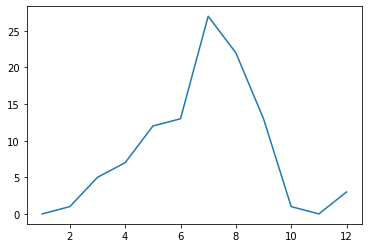

In [179]:
# 월별 사고 발생 횟수
x, y = zip(*month)  # * : unpacking
plt.plot(x, y)
plt.show() 
# 여름에 많은 사고, 겨울에 사고 적음
# 더위 및 더위로 인한 땀이 사고에 크게 작용할 것으로 추정

In [180]:
hourdict = {}
for i in range(104):
    if int(df['time'][i][3]) not in hourdict:
        hourdict[int(df['time'][i][3])] = 1
    else:
        hourdict[int(df['time'][i][3])] = hourdict[int(df['time'][i][3])] + 1

hourdict[2], hourdict[3], hourdict[4], hourdict[5] = 0, 0, 0, 0
hour = sorted(hourdict.items())
hour

[(1, 2),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 2),
 (7, 3),
 (8, 3),
 (9, 8),
 (10, 16),
 (11, 10),
 (12, 5),
 (13, 4),
 (14, 10),
 (15, 10),
 (16, 9),
 (17, 11),
 (18, 1),
 (19, 2),
 (20, 3),
 (21, 2),
 (23, 1),
 (24, 2)]

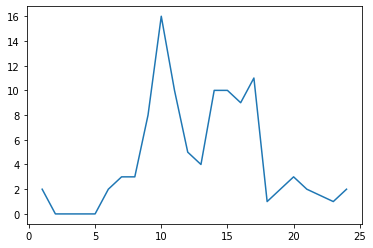

In [181]:
# 시간대별 사고 발생 횟수
x, y = zip(*hour)  # * : unpacking
plt.plot(x, y)
plt.show() 

# 일과 시간(8:30~17:30)에 대부분의 사고 발생
# 점심 식사 시간에 유의미한 감소 - 이동 중 사고 외에 발생 안하므로 감소하는 것으로 추정

# 2. 장소

In [182]:
df['본문'][2]

'\r\n\r\nFrom: 이기홍 <ghlee@koreazinc.co.kr>\r\nSent: Wednesday, September 7, 2022 11:45 AM\r\nTo: 온산_온산사용자전체 <onsan_onsanuserall@koreazinc.co.kr>\r\nCc: 이제중 <jjlee@koreazinc.co.kr>; 최윤범[Yun B. Choi] <ybchoi@koreazinc.co.kr>; 노진수 <jsrho@koreazinc.co.kr>; 박기덕[KD Park] <kpark@koreazinc.co.kr>; 권인대 <idkwon@koreazinc.co.kr>; 김영규 <kykdhcs@koreazinc.co.kr>; 본사_감사팀 <sel_audit@koreazinc.co.kr>\r\nSubject: 안전사고 발생 속보(전해팀)\r\n\r\n\r\n\r\n안전사고 발생 속보(전해팀)\r\n\r\n1. 사고발생 일시\r\n2022년 9월 07일(수) 10:20분경\r\n\r\n2. 사고장소\r\n\u3000전해 6계열 전해조 중앙통로\r\n\r\n3. 사고내용\r\n전해6계열 급액배관 청소차 배관위에 있는 FRP 그레이팅 작업상에 손가락을 넣고 들어 옮기는 과정에서 미끌림에 작업상을 놓쳐 왼손검지 손톱위 부딪힘.\r\n\r\n4. 사고원인\r\n작업상 옮기는 과정에서 손에서  미끌림\r\n\r\n5. 환자상태 및 인적사항\r\n1) 전해팀  김민수 (94년생)\r\n2) 환자 상태 : 왼손 검지 손톱위 1센치 피부 긁힘\r\n                        작업시 안전장갑 착용\r\n\r\n6. 병원 및 이송 방법\r\n소내 건강관리실 치료후 엑스레이 촬영 권장 받아\r\n 병원 방문 예정\r\n\r\n\r\n'

In [183]:
# '\n  \d[.].+' 또는 '\n\d[.].+' 둘 중 하나로 구성되어 있음 확인

a = []
for i in range(len(df)):
    a.append(re.findall('\n\d[.].+|\n  \d[.].+', df.iloc[i,0]))
        
for i in range(len(a)):
    if a[i] ==[]:
        print((i))

In [184]:
fa=[]
for i in range(len(df)):
    # 항목을 전부 찾기
    a = re.findall('\n\d[.].+|\n \d[.].+|\n  \d[.].+', df.iloc[i,0])  
    b=[]
    for i in range(len(a)):
        if a[i].startswith('\n1. 환자') or a[i].startswith('\n2. 인적'):
            b.append(i)

    # 인덱스 내림차순 정렬 후 원소 제거
    b.sort(reverse=True)
    for j in b:
        del a[j]

    # or 연산자로 join
    fa.append("|".join(a))

In [185]:
# 빈 값 확인
for i in fa:
    if i=='':
        print(i)

In [186]:
fa[32] = '\n1. 일시\r|\n2. 장소\r|\n3. 사고내용\(경과\)\r|\n4. 사고원인\r|\n5. 환자상태 및\r|\n6. 병원 및 이송 방법\r'

In [187]:
splitlist=[]
for i in range(len(df)):
        splitlist.append(re.split(fa[i], df.iloc[i,0]))

for i in range(len(splitlist)):
        splitlist[i] = [j for j in splitlist[i] if j]

In [188]:
splitlist1 = splitlist.copy()

In [189]:
# 시간 앞 쓸데 없는 원소, 시간 제거
for i in range(len(splitlist)):
    splitlist1[i] = [j for j in splitlist1[i] if j]
    splitlist1[i].pop(0)


In [190]:
splitlist1[-12]

['\n\r\n  *   2022년 4월 12일 오전 07:40 경\r\n\r',
 '\n\r\n  *   #4OF황산 Heat Recovery Hot Water Tank 동측\r\n\r',
 '\n\r\n  *   Hot Water Tank의 Drain Valve 개도 조작을 위해 Tank 동쪽에서 진입 중 바닥에 흐르고 있던 Hot Water(순수)가 안전화 내부(발등부분)로 유입되어 양쪽 발등에 화상 발생\r\n\r',
 '\n\r\n  *   Drain 되고 있는 고온수의 위험성 인지 부족\r\n\r',
 '\n\r\n  *   소속 : 배소2팀(2반)\r\n  *   성명 : 신의섭(26세), 21.10.05입사\r\n\r',
 '\n\r\n  *   3계열 안전관리자(서만성) 차량으로 울산 남구 소재 화사한외과로 이동하여 치료 중\r\n\r\n\r\n\r\n왕준용\r\n배소2팀 / 과장\r\nMob. 010-8504-9700 / Tel. 052-231-6141 / Fax. 052-231-6148 / e-Mail : jywong@koreazinc.co.kr<mailto:jywong@koreazinc.co.kr>\r\n고려아연㈜ 온산제련소\r\n44997 울산광역시 울주군 온산읍 이진로 139\r\nwww.koreazinc.co.kr<http://www.koreazinc.co.kr/>\r\n\r\n']

In [191]:
# *표 스트랩 처리
splitlist1[-12] = [i.strip().strip('*').strip() for i in splitlist1[-12]]
splitlist1[-12]

['2022년 4월 12일 오전 07:40 경',
 '#4OF황산 Heat Recovery Hot Water Tank 동측',
 'Hot Water Tank의 Drain Valve 개도 조작을 위해 Tank 동쪽에서 진입 중 바닥에 흐르고 있던 Hot Water(순수)가 안전화 내부(발등부분)로 유입되어 양쪽 발등에 화상 발생',
 'Drain 되고 있는 고온수의 위험성 인지 부족',
 '소속 : 배소2팀(2반)\r\n  *   성명 : 신의섭(26세), 21.10.05입사',
 '3계열 안전관리자(서만성) 차량으로 울산 남구 소재 화사한외과로 이동하여 치료 중\r\n\r\n\r\n\r\n왕준용\r\n배소2팀 / 과장\r\nMob. 010-8504-9700 / Tel. 052-231-6141 / Fax. 052-231-6148 / e-Mail : jywong@koreazinc.co.kr<mailto:jywong@koreazinc.co.kr>\r\n고려아연㈜ 온산제련소\r\n44997 울산광역시 울주군 온산읍 이진로 139\r\nwww.koreazinc.co.kr<http://www.koreazinc.co.kr/>']

In [192]:
# 전부 strip 처리
locationlist = []
for i in range(len(splitlist1)):
    for j in range(len(splitlist1[i])):
        splitlist1[i][j] = splitlist1[i][j].strip()
    # 장소    
    locationlist.append(splitlist1[i][1].split()[0])

In [194]:
# 공장 별 팀 딕셔너리 
factory = {1:['전해', '조액', '정액', '분석관리'],
           2:['동력', '귀금속', '정수', '정련', '제련'],
           3:['동박', '배소', '동전해', '주조'],
           4:['연황산', '반도체황산', '아연', '연정련'],
           5:['부두', '저광사', '주조'],
           6:['OF', 'SF']}

In [195]:
# 팀 이름으로 시작하면 공장 이름으로 대체하기
for i in range(104):
    for j in range(1,7):
        for k in factory[j]:
            if k in locationlist[i]:
                locationlist[i] = str(j)
                
# 공장 이름으로 시작하면 공장명만 남기기(1공장 -> 1)
for i in range(104):
    if '공장' in locationlist[i]:
        locationlist[i] = locationlist[i].strip('공장')

In [227]:
# 리스트 카운트하는 딕셔너리
locationdic = {x:locationlist.count(x) for x in locationlist}
locationdic['etc'] = 0
LDcopy = locationdic.copy()

# 1~6공장 제외는 etc 처리
for i in LDcopy.keys():
    if i not in ['1','2','3','4','5','6','etc']:
        locationdic['etc'] = locationdic['etc'] + locationdic[i] 
        del locationdic[i]
        
LD = sorted(locationdic.items())    # dict가 아닌 dict.items()를 sorted해야 함 -> (k,v) 리스트 반환
LD

[('1', 34), ('2', 25), ('3', 17), ('4', 3), ('5', 2), ('6', 13), ('etc', 10)]

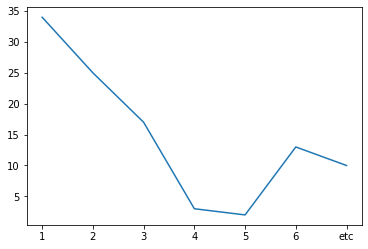

In [228]:
# 공장 별 사고 발생 횟수
x, y = zip(*LD)  # * : unpacking
plt.plot(x, y)
plt.show() 

# 대체적으로 인원 수에 비례하는 사고 빈도
# 공장별 정확한 인원, etc로 분류된 것들 정확한 배치를 통해 develop 가능할 것

# 3. 사고 내용

In [198]:
for i in range(len(splitlist1)):
    print(splitlist1[i][2])

도면확인을 위해 쪼그리고 앉아 있다가 일어서는 도중 어지러움증상으로 주저 앉음.(외상없음)
4번 주조기 배관 막힘으로 트러블 해소 중 주조기 용탕이 왼쪽 손목부위에 튀어 경미한 화상발생. (안전장갑,반피장갑 이중 착용)
전해6계열 급액배관 청소차 배관위에 있는 FRP 그레이팅 작업상에 손가락을 넣고 들어 옮기는 과정에서 미끌림에 작업상을 놓쳐 왼손검지 손톱위 부딪힘.
Dross처리 과정에서 목 부위로 탕이 비산하여 화상을 입음
잔탕인양 과정에서 주수 중 Dross 비산하여 화상
조액팀 월대작업 덤프트럭(06-6862)이 2공장 정문에서 1공장쪽으로

좌회전을 하기위해 앞으로 나오다가 물류팀 Slime Cake운반작업 차량(06-2703)

이 1공장에서 6공장 방향으로 직진중임을 발견하고 멈칫했으나 물류팀

덤프트럭의 적재함과 월대작업 덤프트럭 차량앞의 백미러 부분이 스치는

접촉사고가 발생하였음.
회의 도중 호흡곤란으로 고통을 호소함
Coal 하역중 Dumping Cylinder 파손으로 Bucket부 부분 전도
대기실에서 점심식사 중 오른쪽 눈에 이물감이 느껴져 확인하여 보니 충혈됨
부두정광 운송차량(25톤 덤프트럭) 2공장 측문 출차중 차단기가

내려와 열리지 않는 상태에서 차단기 인식을 위해 후진 중

뒤에 대기하던 차량을 인지하지 못하고 접촉사고 발생.(인명피해 無)
작업 후 남은 SHEET 잔재 정리 중 발생한 찰과상
ECO CELL 점검 후 식사를 위하여 이동 중 계단에 미끄러져 넘어짐
8월 31일 12시 30분경 M/C 컨트롤룸 내 220v 콘센트 단자에서 원인불명 화재 (천장 누수로 인한 누전으로 발화 추정)가 발생하였음. 해당 Area 근무자 초기 진화 하였음.
8월 28일 11시 00분경 Boiler Bundle Leak로 인하여 Roaster 급광구 양압이 형성되어 Slinger Feeder Belt및 Feeding Conveyor Belt 화재 발생함. 즉시 근무자 초기 진화 하였음.
2직 출근시 자전거 타고 오다가 넘어짐. 오른쪽 약지

# 4. 사고 원인

In [199]:
for i in range(len(splitlist1)):
    print(splitlist1[i][3])

쪼그리고 앉아 도면 확인후 어지러움 발생.
안전 장갑과 상의사이 피부가 외부로 노출되어 있었으며,
주조기 사출 과정 중 액이 튀는 현상이 발생함.
작업상 옮기는 과정에서 손에서  미끌림
우천으로 Cathode(10계열) 내 잔여 수분으로 인해 용해로 내부에서
용탕이 비산함
잔탕 냉각시간 부족
- 운전자의 부주의
감기몸살 (코로나증세 보임)
전날 병원에서 검사를 받았으나 음성 진단
Dumping Cylinder 파손
1) 먼지 유입으로 추정
- 우천으로 인한 시야 불량

- 후진시 주의 불량
1) 잔재 SHEET를 이동 중 피부가 베임
1) 계단 이동 중 우천으로 인한 미끄러짐
우천으로 인한 누수 – 누전으로 추정
 (콘센트 미사용 – 천장에 누수 현상 있음)
Bundle Leak로 인한 급격한 수분유입
자전거 운행시 도로변 미끄럼 상태 파악 못함.
협소한 작업공간과 통로로 인하여 작업자의 자세가 불안전하여 작업중 은괴가 손에서 미끄러져 떨어짐.
근무자 오른쪽 검지 손가락이 수동 Damper의 손잡이와 Flange사이에 부딪힘.
호스 절단작업시 내산 코팅장갑 착용으로 수분에 의한 미끌림
삼거리 공간에서 좌/우 후진시 시야 확보 불충분 및 해당 취약공간에 차량이

주차됨.
동 결정이 있는 Hose 청소시 보안경 미착용으로 오른쪽 눈에 동 결정이 들어감
차간 간격 미확보에 따른 차단기 오류로 판단됨

(추후 CCTV 및 차량용 블랙박스 확인)
화분에서 복도 바닥으로 흘러 나온 물에 미끄러짐
보행 중 디딤발 및 양극판 후크 고리 미확인
땀을 많이 흘림으로 인한 탈진 (추정)
인적 피해 없음
Panel 내부 조작TR(변압기) 고장으로 인한 화재로 추정
- 운전원 부주의

- 사고발생시각 1공장 진입/대기차량 많았음
Pump 과부하로 인한 화재로 추정
- 조사 중 -
- 운전원 부주의

- 럼프통에 럼프 과다적재(편하중 발생)
불안정한 자세로 추정
- 덤프트럭 기사 부주의
1) Pipe Rack의 Girder가 뒤집힌 상태로 설치되어 수정작업을
하던 중 Girder 끝단

# 5. 상태 및 인적사항 

In [200]:
for i in range(len(splitlist1)):
    print(splitlist1[i][4])

1) 환자상태 : 외상없음. 면담시 대화 상태 정상
2) 인적사항 : 김홍식(90년생), 금광기업
1. 환자상태 : 왼쪽 손목 경미한 화상
2. 인적사항 : 정액E반 조성준(91년생
1) 전해팀  김민수 (94년생)
2) 환자 상태 : 왼손 검지 손톱위 1센치 피부 긁힘
                        작업시 안전장갑 착용
1) 환자상태 : 화상 (목 뒤 4cm 가벼운 화상 발생)
2) 인적사항 : 주조B반, 김동현 (92년생)
1) 환자상태 : 화상 (왼쪽 팔 0.5cm 수포발생, 목뒤 4cm 가벼운 화상 추정)
2) 인적사항 : 박기도 (92년생)
특이 사항

- 차량 파손 상태

가해차량: 06-6862 백미러 파손

피해차량: 고려아연㈜ 물류팀 덤프트럭(06-2703) 적재함 긁힘.

- 운전자 정보

소속 : 케이지엑스(한진미)

이름 : 김영주(1965년생)

특이사항 : 부상자 없음
1) 환자상태 : 호흡곤란
2) 인적사항 : 배선우 (97년생)
인적피해 없음 / 물적피해 없음
1) 소속 : 대한통운
2) 인적사항 : 김정규 (52년생)
1) 환자상태 : 오른쪽 눈 충혈
2) 소속 : 명건산업
3) 인적사항 : 김일 (56세)
특이 사항

- 피해상황

차량피해: 피해 차량(승용차) 본네트 스크레치

- 운전자 정보

소속 : 케이지엑스

이름 : 김차한(58세)
1) 환자상태 : 오른쪽 팔뚝 부위 5CM 베임.
2) 인적사항 : 고경열(70년생)
1) 환자상태 : 허리, 어깨 통증
2) 인적사항 : 황현우 (97년 생)
인적 피해 없음.
설비 피해 없음.


㨀场楲整癅湥呴呯慲散潌१㔱㠲ਰ吀呯慲散潌१㔱㠲0?
인적 피해 없음.
Slinger Feeder Belt 2기 소손
Feeding Conveyor Belt 1기 소손
급광구 주변 Cable 부분 소손

*긴급 보수 실시로 인한 속보 지연






Dong Wook Ryu

ROASTING 2 TEAM
Onsan Complex
Korea Zinc Company, Ltd.

Tel: +8

In [201]:
for i in range(len(splitlist1)):
    if len(splitlist1[i]) < 6:
        print(i)

12
13
36
37
47


In [202]:
splitlist1[11][4]

'1) 환자상태 : 허리, 어깨 통증\r\n2) 인적사항 : 황현우 (97년 생)'

In [203]:
years = []
noyears = []
two = []
for i in range(len(splitlist1)):
    if len(re.findall('\d{2,4}년생|\d{2,4}년 생|\d{2}세|\d{2}[.]\d{1,2}[.]\d{2}|\d{2,4}년 \d{1,2}월', splitlist1[i][4])) == 1:
        years.append(re.findall('\d{2,4}년생|\d{2,4}년 생|\d{2}세|\d{2}[.]\d{1,2}[.]\d{2}|\d{2,4}년 \d{1,2}월', splitlist1[i][4]))
    elif len(re.findall('\d{2}세|\d{2} 세', splitlist1[i][4])) ==2:
            # ~세, ~세 이런 경우만 두 분 / 나머지는 입사일자
        years.append(re.findall('\d{2}세|\d{2} 세', splitlist1[i][4]))

In [204]:
# 빈 원소 확인
for i in range(len(years)):
    if years[i] == []:
        print(i)

In [205]:
# 년생, 년 월 제거
for i in range(len(years)):
    if years[i][0].endswith('세'):
        continue
    else:
        years[i] = re.findall('\d{2,4}', years[i][0])

In [206]:
for i in range(len(years)):
    # 19xx -> xx로 변경
    if years[i][0].startswith('19'):
        years[i] = [years[i][0][2:]]
    # 월일 제거
    elif len(years[i]) > 1:
        years[i] = [years[i][0]]
    else:
        continue
# years

In [207]:
# 나이대 함수 정의
def age_ctg(age):
    age = (age // 10) *10
    return age

In [208]:
# 한국 나이로 변경
for i in range(len(years)):
    if years[i][0].endswith('세'):
        years[i] = age_ctg(int(years[i][0][:-1]))
    else:
        years[i] = age_ctg(2022 - 1900 -int(years[i][0]) + 1)

In [209]:
years

[30,
 30,
 20,
 30,
 30,
 50,
 20,
 70,
 50,
 50,
 50,
 20,
 30,
 60,
 50,
 20,
 30,
 40,
 40,
 30,
 50,
 20,
 60,
 50,
 60,
 50,
 30,
 50,
 20,
 30,
 40,
 40,
 20,
 40,
 40,
 40,
 50,
 50,
 40,
 50,
 40,
 50,
 20,
 30,
 50,
 30,
 30,
 60,
 50,
 30,
 30,
 40,
 30,
 20,
 40,
 60,
 50,
 20,
 50,
 50,
 60,
 30,
 40,
 50,
 40,
 70,
 50,
 60,
 20,
 60,
 40]

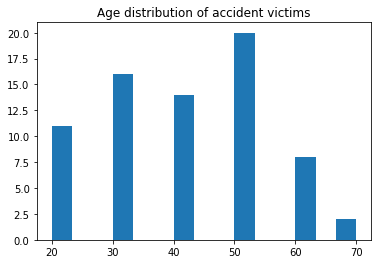

In [210]:
plt.hist(years, bins=15)
plt.title("Age distribution of accident victims")
plt.show()

In [211]:
# 50 - 30 - 40 - 20 - 60 - 70 순
# 총 근로자 데이터가 있으면, 비율로 계산하여 더 의미있는 결과 도출 가능할 것

# 6. 병원 및 이송방법